In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import ensemble
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [2]:
matches = pd.read_csv('C:/Users/ashis/Documents/Data/match.csv', index_col=0)
players = pd.read_csv('C:/Users/ashis/Documents/Data/players.csv')
hero_names = pd.read_csv('C:/Users/ashis/Documents/Data/hero_names.csv')
#cluster_regions = pd.read_csv('C:/Users/ashis/Documents/Data/cluster_regions.csv')
#items = pd.read_csv('C:/Users/ashis/Documents/Data/item_ids.csv')

#test_labels = pd.read_csv('C:/Users/ashis/Documents/Data/test_labels.csv', index_col=0)
#test_players = pd.read_csv('C:/Users/ashis/Documents/Data/test_player.csv')
#train_labels = matches['radiant_win'].astype(int)
#test_players = pd.read_csv('C:/Users/ashis/Documents/Data/test_player.csv')

# Input variables include 500,000 player samples with 73 features
# 50,000 matches with 12 features

In [3]:
data_set = players[['match_id', 'account_id', 'hero_id', 'player_slot', 'gold',
       'gold_spent', 'gold_per_min', 'xp_per_min', 'kills', 'deaths',
       'assists', 'denies', 'last_hits', 'stuns', 'hero_damage',
       'hero_healing', 'tower_damage']]
print(players.shape)
print(matches.shape)
data_set.head()

(500000, 73)
(50000, 12)


,match_id,account_id,hero_id,player_slot,gold,gold_spent,gold_per_min,xp_per_min,kills,deaths,assists,denies,last_hits,stuns,hero_damage,hero_healing,tower_damage
0,0,0,86,0,3261,10960,347,362,9,3,18,1,30,76.7356,8690,218,143
1,0,1,51,1,2954,17760,494,659,13,3,18,9,109,87.4164,23747,0,423
2,0,0,83,2,110,12195,350,385,0,4,15,1,58,None,4217,1595,399
3,0,2,11,3,1179,22505,599,605,8,4,19,6,271,None,14832,2714,6055
4,0,3,67,4,3307,23825,613,762,20,3,17,13,245,None,33740,243,1833


# Graphical representation of some features of interest in the dataset

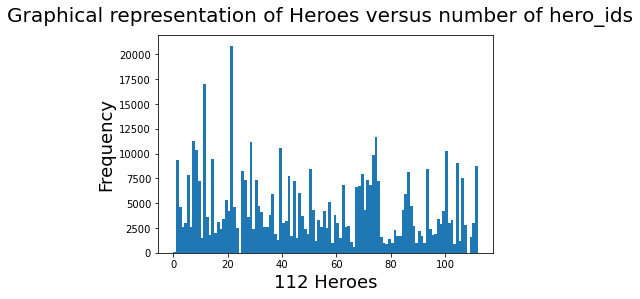

In [5]:
#Graphical representation of Heroes versus number of hero_id
fig = plt.figure()
fig.suptitle('Graphical representation of Heroes versus number of hero_ids', fontsize=20)
num_heroes = len(hero_names)
plt.hist(players['hero_id'], num_heroes)
plt.xlabel('112 Heroes', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.show()

In [6]:
#Detailing how frequently certain players are being chosen
kills_counts = players['hero_id'].value_counts().rename_axis('Hero_id').reset_index(name='frequency')
print(kills_counts.head())

   Hero_id  frequency
0       21      20881
1       11      17007
2       74      11676
3        7      11323
4       28      11181


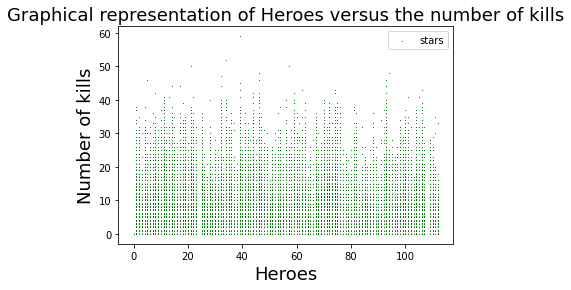

In [7]:
#Graphical representation of Heroes versus the number of kills
x = players['hero_id']
y = players['kills']

# plotting points as a scatter plot 
plt.scatter(x, y, label= "stars", color= "green",  
            marker= "*", s=0.001)
# x-axis label 
plt.xlabel('Heroes', fontsize=18) 
# frequency label 
plt.ylabel('Number of kills', fontsize=18) 
# plot title 
plt.title('Graphical representation of Heroes versus the number of kills', fontsize=18) 
# showing legend 
plt.legend() 
  
# function to show the plot 
plt.show() 

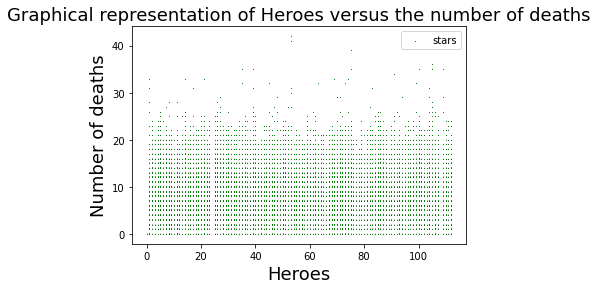

In [8]:
#Graphical representation of Heroes versus the number of deaths
x = players['hero_id']
y = players['deaths']

# plotting points as a scatter plot 
plt.scatter(x, y, label= "stars", color= "green",  
            marker= "*", s=0.001)
# x-axis label 
plt.xlabel('Heroes', fontsize=18) 
# frequency label 
plt.ylabel('Number of deaths', fontsize=18) 
# plot title 
plt.title('Graphical representation of Heroes versus the number of deaths', fontsize=18) 
# showing legend 
plt.legend() 
  
# function to show the plot 
plt.show()

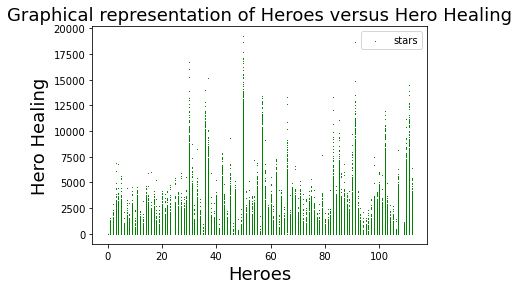

In [9]:
#Graphical representation of Heroes versus the number of deaths
x = players['hero_id']
y = players['hero_healing']

# plotting points as a scatter plot 
plt.scatter(x, y, label= "stars", color= "green",  
            marker= "*", s=0.001)
# x-axis label 
plt.xlabel('Heroes', fontsize=18) 
# frequency label 
plt.ylabel('Hero Healing', fontsize=18) 
# plot title 
plt.title('Graphical representation of Heroes versus Hero Healing', fontsize=18) 
# showing legend 
plt.legend() 
  
# function to show the plot 
plt.show()

# Writing code to generate a scatterplot of Heroes versus Number of Wins

In [10]:
data_set = players[['match_id', 'account_id', 'hero_id', 'player_slot', 'gold',
       'gold_spent', 'gold_per_min', 'xp_per_min', 'kills', 'deaths',
       'assists', 'denies', 'last_hits', 'stuns', 'hero_damage',
       'hero_healing', 'tower_damage']]

In [11]:
new_win = []
radiant_win = matches['radiant_win']
for i in radiant_win:
    for j in range(0, 5):
        new_win.append(i)
    if(i == False):
        for k in range(0, 5):
            new_win.append(True)
    else:
        for k in range(0, 5):
            new_win.append(False)

In [12]:
print(len(new_win))
data_set['win'] = new_win
data_set['win'] = data_set['win'].astype(int)
data_set.shape

500000


<ipython-input-12-191b722fdd20>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_set['win'] = new_win
<ipython-input-12-191b722fdd20>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_set['win'] = data_set['win'].astype(int)


(500000, 18)

In [13]:
d1 = {}
hero = data_set['hero_id']
win = data_set['win']
#print(hero[0])
#print(len(win))
for i in range(0, len(hero)):
    d1.setdefault(hero[i], []).append(win[i])

In [14]:
hero_id = []
win_rate = []
for i in range(0, 112):
    #print(i)
    if(i != 24 and i != 108):
        elem = sum(d1.get(i))
        win_rate.append(elem)
        hero_id.append(i)
    else:
        print(i)

24
108


# Two Hero ids are missing so we have 110 heroes in the dataset

In [15]:
hero_id.append(24)
win_rate.append(0)
hero_id.append(108)
win_rate.append(0)

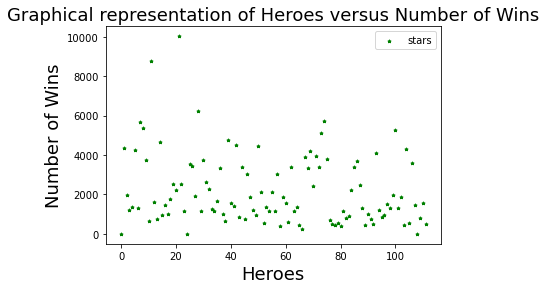

In [16]:
#Graphical representation of Heroes versus the number of deaths
x = hero_id
y = win_rate

# plotting points as a scatter plot 
plt.scatter(x, y, label= "stars", color= "green",  
            marker= "*", s=10)
# x-axis label 
plt.xlabel('Heroes', fontsize=18) 
# frequency label 
plt.ylabel('Number of Wins', fontsize=18) 
# plot title 
plt.title('Graphical representation of Heroes versus Number of Wins', fontsize=18) 
# showing legend 
plt.legend() 
  
# function to show the plot 
plt.show()

# Top 5 most popular heroes and their win rate

In [20]:
hero_name = hero_names.drop(columns = ['hero_id', 'name'])
hero_names.drop([5, 6])
hero_name['hero_id'] = hero_id 
hero_name['win_rate'] = win_rate
hero_name = hero_name.drop(columns = ['localized_name'])
#print(len(hero_id))
#print(hero_name.shape)
#hero_name.head(75)
hero1 = hero_name.loc[hero_name['hero_id'] == 21]
hero2 = hero_name.loc[hero_name['hero_id'] == 11]
hero3 = hero_name.loc[hero_name['hero_id'] == 74]
hero4 = hero_name.loc[hero_name['hero_id'] == 7]
hero5 = hero_name.loc[hero_name['hero_id'] == 28]
print (hero1)
print (hero2)
print (hero3)
print (hero4)
print (hero5)

    hero_id  win_rate
21       21     10026
    hero_id  win_rate
11       11      8785
    hero_id  win_rate
73       74      5733
   hero_id  win_rate
7        7      5700
    hero_id  win_rate
27       28      6254


# Data Cleansing
We believe matches that takes less than 15 minutes to finish or/and are abandoned do not add value to the outcome of the game.
We are going to use the dataframe.drop_duplicates function to do so. By default, it removes duplicate rows based on all columns.

In [21]:
dfs_bad_matches = []

In [22]:
abandoned_matches = players[players.leaver_status > 1]
abandoned_matches = abandoned_matches[['match_id']]
abandoned_matches = abandoned_matches.drop_duplicates().reset_index(drop=True)
dfs_bad_matches.append(abandoned_matches)
abandoned_matches

,match_id
0,32
1,36
2,49
3,73
4,91
...,...
4621,49954
4622,49958
4623,49964
4624,49975


In [23]:
short_length = 15 * 60
short_matches = matches[matches.duration < short_length].reset_index()
short_matches = short_matches[['match_id']]
dfs_bad_matches.append(short_matches)
short_matches

,match_id
0,836
1,1221
2,1268
3,1279
4,1632
...,...
127,47925
128,48315
129,48879
130,49112


# Drop the matches that are abandoned and/or less than 15 minutes. The following code takes more than 10 minutes to execute, we need a way to vectorize this operation.

In [24]:
bad_match_ids = pd.concat(dfs_bad_matches, ignore_index=True).drop_duplicates()
for i in bad_match_ids.match_id:
    if(i == 32):
        new_players = players[players.match_id != i]
    new_players = new_players[new_players.match_id != i]

# 46,450 player samples out of 500,000 have been dropped in Players.csv

In [25]:
new_players.shape

(453550, 73)

# 4645 matches out of 50,000 have been dropped in matches.csv

In [26]:
new_matches = matches.drop(bad_match_ids.match_id)
new_matches.shape

(45355, 12)

# We have no null values in features of interest, Good News!

In [27]:
new_players['match_id'].isnull().sum()
new_players['kills'].isnull().sum()
new_players['assists'].isnull().sum()
new_players['hero_id'].isnull().sum()
new_players['deaths'].isnull().sum()
new_players['account_id'].isnull().sum()

0

# Train Set and Test Set
In any data science project, we need to have two sets of data to train and test our model. First, we will create two sets data: train_data and test_data. Then we create two sets of labels: train_labels and test_labels.

In [28]:
data_set = new_players[['match_id', 'account_id', 'hero_id', 'player_slot', 'gold',
       'gold_spent', 'gold_per_min', 'xp_per_min', 'kills', 'deaths',
       'assists', 'denies', 'last_hits', 'stuns', 'hero_damage',
       'hero_healing', 'tower_damage']]
print('Players set shape: ', new_players.shape)
print(data_set.shape)

Players set shape:  (453550, 73)
(453550, 17)


# 80% train set, 20% test set

In [30]:
train_set, test_set = train_test_split(data_set, test_size=0.2, shuffle=False)
#Merging hero_names corresponding to hero_ids into the train and test sets
train_set = pd.merge(train_set,hero_names, on = 'hero_id',how = 'left')
test_set = pd.merge(test_set,hero_names, on = 'hero_id',how = 'left')

# Train Label and Test Label

In [31]:
match_id = []
for i in range(0, 50000):
    match_id.append(i)
#data_labels = matches['radiant_win']
#data_labels['match_id'] = match_id
data_labels = matches.drop(columns = ['start_time', 'duration', 'tower_status_radiant', 'tower_status_dire',
       'barracks_status_dire', 'barracks_status_radiant', 'first_blood_time',
       'game_mode', 'negative_votes', 'positive_votes',
       'cluster'])
data_labels['match_id'] = match_id 
data_labels.head()
new_data_labels = data_labels.drop(bad_match_ids.match_id)

# 80% Train Label, 20% Test Label

In [32]:
train_labels, test_labels = train_test_split(new_data_labels, test_size=0.2, shuffle=False)

In [33]:
print("Train set shape: ", train_set.shape)
print("Train labels shape: ", train_labels.shape)
print("Test set shape: ", test_set.shape)
print("Test labels shape:", test_labels.shape)

Train set shape:  (362840, 19)
Train labels shape:  (36284, 2)
Test set shape:  (90710, 19)
Test labels shape: (9071, 2)


# Input variables-it includes 3,62,840 samples with 19 features

In [34]:
print("Input variables: ", train_set.columns)
train_set.tail()

Input variables:  Index(['match_id', 'account_id', 'hero_id', 'player_slot', 'gold',
       'gold_spent', 'gold_per_min', 'xp_per_min', 'kills', 'deaths',
       'assists', 'denies', 'last_hits', 'stuns', 'hero_damage',
       'hero_healing', 'tower_damage', 'name', 'localized_name'],
      dtype='object')


,match_id,account_id,hero_id,player_slot,gold,gold_spent,gold_per_min,xp_per_min,kills,deaths,assists,denies,last_hits,stuns,hero_damage,hero_healing,tower_damage,name,localized_name
362835,40003,0,97,128,2994,17740,325,490,2,8,21,1,93,64.0808,5451,0,245,npc_dota_hero_magnataur,Magnus
362836,40003,0,18,129,3020,24985,554,483,13,14,24,1,515,77.9762,24079,0,7097,npc_dota_hero_sven,Sven
362837,40003,135549,51,130,2845,24960,396,484,9,8,24,4,188,83.1157,20761,0,1648,npc_dota_hero_rattletrap,Clockwerk
362838,40003,24111,44,131,5963,29925,645,482,29,11,11,7,436,43.1579,43050,0,4780,npc_dota_hero_phantom_assassin,Phantom Assassin
362839,40003,135550,5,132,1153,26180,397,466,7,8,17,3,169,4.63364,15000,1595,686,npc_dota_hero_crystal_maiden,Crystal Maiden


# radiant_win is the target variable-Expected Output-36284 labels

In [37]:
train_labels.head()

,radiant_win,match_id
match_id,,
0,True,0
1,False,1
2,False,2
3,False,3
4,True,4


# We believe our data is ready to feed in for Logistic Regression

In [38]:
new_win = []
radiant_win = new_matches['radiant_win']
for i in radiant_win:
    for j in range(0, 5):
        new_win.append(i)
    if(i == False):
        for k in range(0, 5):
            new_win.append(True)
    else:
        for k in range(0, 5):
            new_win.append(False)

In [39]:
print(len(new_win))
data_set['win'] = new_win
data_set['win'] = data_set['win'].astype(int)
data_set.shape

453550


<ipython-input-39-191b722fdd20>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_set['win'] = new_win
<ipython-input-39-191b722fdd20>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_set['win'] = data_set['win'].astype(int)


(453550, 18)

# Calculating Mean based on Win Rate

In [40]:
data_set_mean  = data_set.groupby('win').mean()
data_set_mean.head()

,match_id,account_id,hero_id,player_slot,gold,gold_spent,gold_per_min,xp_per_min,kills,deaths,assists,denies,last_hits,hero_damage,hero_healing,tower_damage
win,,,,,,,,,,,,,,,,
0,25058.74887,39710.217991,50.490976,68.45953,1004.107913,12049.552574,348.442337,398.436009,5.919916,9.263146,9.586339,4.907119,122.385272,10949.817762,355.986952,456.650932
1,25058.74887,40210.361971,50.717341,63.54047,2793.121270,16368.707199,481.523753,506.793271,8.996084,6.201698,14.273946,5.489119,139.394510,13737.931611,597.428266,2193.190969
